# **Crop Production Analysis in India**

###**Step 1: Introduction**

**Project Overview:** The Crop Production Analysis project aims to analyze historical crop production data in India to identify trends, patterns, and factors influencing crop yields. This project involves extracting data, transforming it for analysis, cleaning it to ensure accuracy, and performing detailed analyses to draw insights. Additionally, the project includes building a predictive model to forecast future crop production using machine learning techniques.

**Objectives:** To analyze crop production trends across different states and districts in India.To understand the impact of different seasons on crop production.To identify key crops contributing to overall production.To develop a predictive model to forecast future crop production based on historical data.

###**Step 2: Tools and Technologies:**

- **Programming Languages**: Python, SQL
- **Software/Platforms**: Jupyter Notebook
- **Libraries:**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

###**Step 3: Data Collection**

**Data Sources:** The primary dataset used in this analysis is 'crop_production.csv'. This dataset contains detailed information on crop production across various states and districts in India, including columns such as State_Name, District_Name, Crop_Year, Season, Crop, Area, and Production.

**Data Description:**

The dataset comprises:
- **State_Name:** The name of the state.
- **District_Name:** The name of the district.
- **Crop_Year:** The year of crop production.
- **Season:** The season in which the crop was grown (e.g., Kharif, Rabi).
- **Crop:** The type of crop.Area: The area under cultivation (in hectares).
- **Production:** The crop production (in tonnes).

###**Step 4: Data Preprocessing***

**Data Cleaning:**
To ensure the dataset is suitable for analysis, the following steps were taken:
- Dropped rows with missing values in the Production column.
- Removed duplicate entries.Ensured correct data types for columns like Crop_Year, Area, and Production.

In [58]:
# Load the dataset
df = pd.read_csv('/content/sample_data/Crop Production data.csv')

In [59]:
# Inspect the first few rows of the dataset
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [60]:
# Check for missing values
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [61]:
# Drop rows with missing values
df = df.dropna()

In [62]:
# Remove duplicates
df = df.drop_duplicates()
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [63]:
# Ensure correct data types
df['Crop_Year'] = df['Crop_Year'].astype(int)
df['Crop_Year']

0         2000
1         2000
2         2000
3         2000
4         2000
          ... 
246086    2014
246087    2014
246088    2014
246089    2014
246090    2014
Name: Crop_Year, Length: 242361, dtype: int64

In [64]:
# Ensure correct data types
df['Area'] = df['Area'].astype(float)
df['Area']

0           1254.0
1              2.0
2            102.0
3            176.0
4            720.0
            ...   
246086       306.0
246087       627.0
246088       324.0
246089    279151.0
246090       175.0
Name: Area, Length: 242361, dtype: float64

In [65]:
# Ensure correct data types
df['Production'] = df['Production'].astype(float)
df['Production']

0           2000.0
1              1.0
2            321.0
3            641.0
4            165.0
            ...   
246086       801.0
246087       463.0
246088     16250.0
246089    597899.0
246090        88.0
Name: Production, Length: 242361, dtype: float64

###**Step 5: Data Transformation and ELT***

In [66]:
# State-wise Area
state_area = df.groupby('State_Name')['Area'].sum().reset_index()
state_area

,State_Name,Area
0,Andaman and Nicobar Islands,3.370834e+05
1,Andhra Pradesh,1.315073e+08
2,Arunachal Pradesh,4.364340e+06
3,Assam,7.037875e+07
4,Bihar,1.282695e+08
5,Chandigarh,1.250200e+04
6,Chhattisgarh,8.293135e+07
7,Dadra and Nagar Haveli,3.965150e+05
8,Goa,1.205678e+06
9,Gujarat,1.549261e+08


In [67]:
state_area.columns = ['State', 'Total Area']
state_area.columns

Index(['State', 'Total Area'], dtype='object')

In [68]:
# District-wise Area
district_area = df.groupby('District_Name')['Area'].sum().reset_index()
district_area

,District_Name,Area
0,24 PARAGANAS NORTH,12478029.0
1,24 PARAGANAS SOUTH,9307672.0
2,ADILABAD,9654803.0
3,AGAR MALWA,276040.0
4,AGRA,7088627.0
...,...,...
641,YADGIR,1920157.0
642,YAMUNANAGAR,2917840.0
643,YANAM,17651.0
644,YAVATMAL,15344755.0


In [69]:
district_area.columns = ['District', 'Total Area']
district_area.columns

Index(['District', 'Total Area'], dtype='object')

In [70]:
# State-wise Production
state_production = df.groupby('State_Name')['Production'].sum().reset_index()
state_production

,State_Name,Production
0,Andaman and Nicobar Islands,7.182232e+08
1,Andhra Pradesh,1.732459e+10
2,Arunachal Pradesh,6.823913e+06
3,Assam,2.111752e+09
4,Bihar,3.664836e+08
5,Chandigarh,6.395650e+04
6,Chhattisgarh,1.009519e+08
7,Dadra and Nagar Haveli,1.847871e+06
8,Goa,5.057558e+08
9,Gujarat,5.242913e+08


In [71]:
state_production.columns = ['State', 'Total Production']
state_production.columns

Index(['State', 'Total Production'], dtype='object')

In [72]:
# District-wise Production
district_production = df.groupby('District_Name')['Production'].sum().reset_index()
district_production

,District_Name,Production
0,24 PARAGANAS NORTH,161685857.8
1,24 PARAGANAS SOUTH,114320886.5
2,ADILABAD,14818313.0
3,AGAR MALWA,279001.0
4,AGRA,33669079.1
...,...,...
641,YADGIR,3093212.0
642,YAMUNANAGAR,40138619.0
643,YANAM,56502137.0
644,YAVATMAL,21813368.0


In [73]:
district_production.columns = ['District', 'Total Production']
district_production.columns

Index(['District', 'Total Production'], dtype='object')

In [74]:
# Season-wise Production
season_production = df.groupby('Season')['Production'].sum().reset_index()
season_production

,Season,Production
0,Autumn,6.441377e+07
1,Kharif,4.029970e+09
2,Rabi,2.051688e+09
3,Summer,1.706579e+08
4,Whole Year,1.344248e+11
5,Winter,4.345498e+08


In [75]:
season_production.columns = ['Season', 'Total Production']
season_production.columns

Index(['Season', 'Total Production'], dtype='object')

In [76]:
# Crop-wise Production
crop_production = df.groupby('Crop')['Production'].sum().reset_index()
crop_production

,Crop,Production
0,Apple,0.000000e+00
1,Arcanut (Processed),1.928310e+05
2,Arecanut,2.034659e+07
3,Arhar/Tur,3.933139e+07
4,Ash Gourd,0.000000e+00
...,...,...
119,Wheat,1.332826e+09
120,Yam,0.000000e+00
121,other fibres,0.000000e+00
122,other misc. pulses,9.704220e+03


In [77]:
crop_production.columns = ['Crop', 'Total Production']
crop_production.columns

Index(['Crop', 'Total Production'], dtype='object')

###**Step 6: Data Analysis & Visualization**

Various visualizations were created to explore the data:

**State-wise Area**

<ipython-input-78-f50fcb61e3ee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Area', y='State', data=state_area.sort_values(by='Total Area', ascending=False), palette='magma')


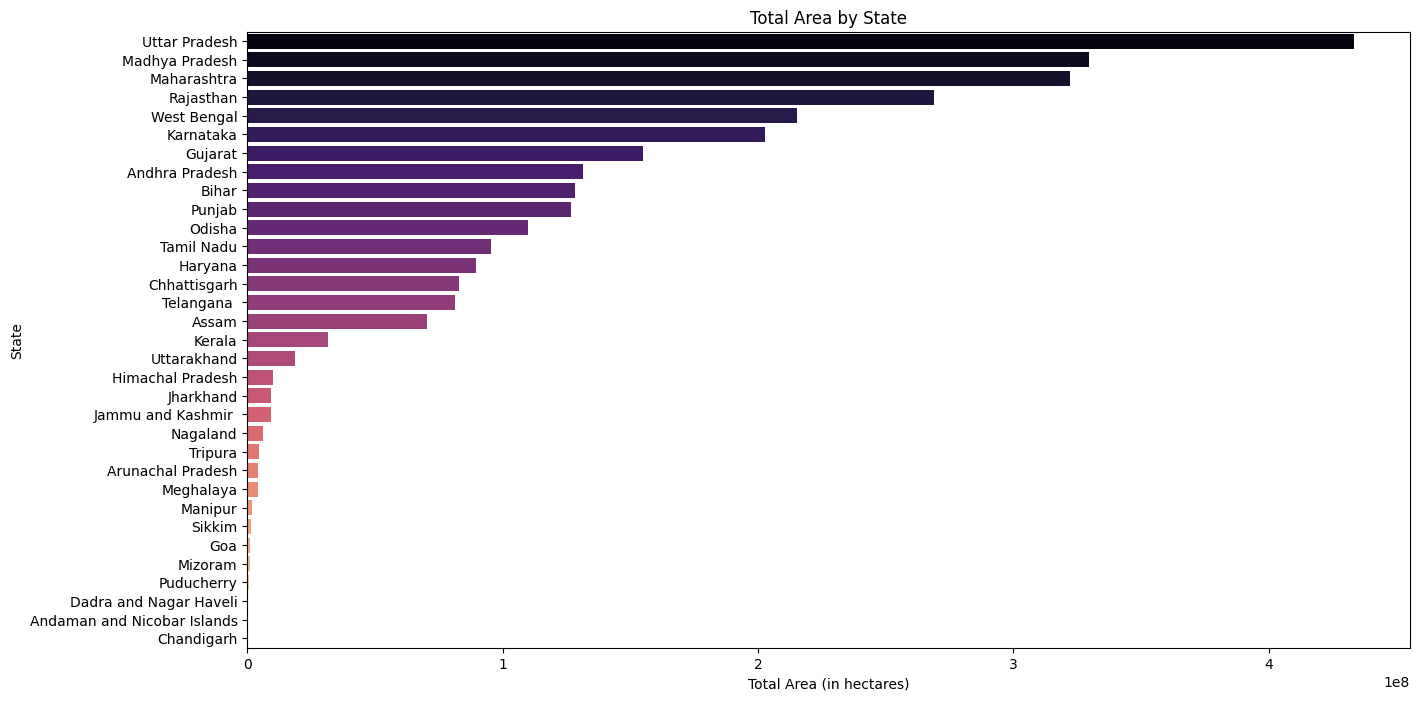

In [78]:
# Plotting state-wise area
plt.figure(figsize=(15, 8))
sns.barplot(x='Total Area', y='State', data=state_area.sort_values(by='Total Area', ascending=False), palette='magma')
plt.title('Total Area by State')
plt.xlabel('Total Area (in hectares)')
plt.ylabel('State')
plt.show()

**State-wise Production**

<ipython-input-79-a2a369ac415e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Production', y='State', data=state_production.sort_values(by='Total Production', ascending=False), palette='viridis')


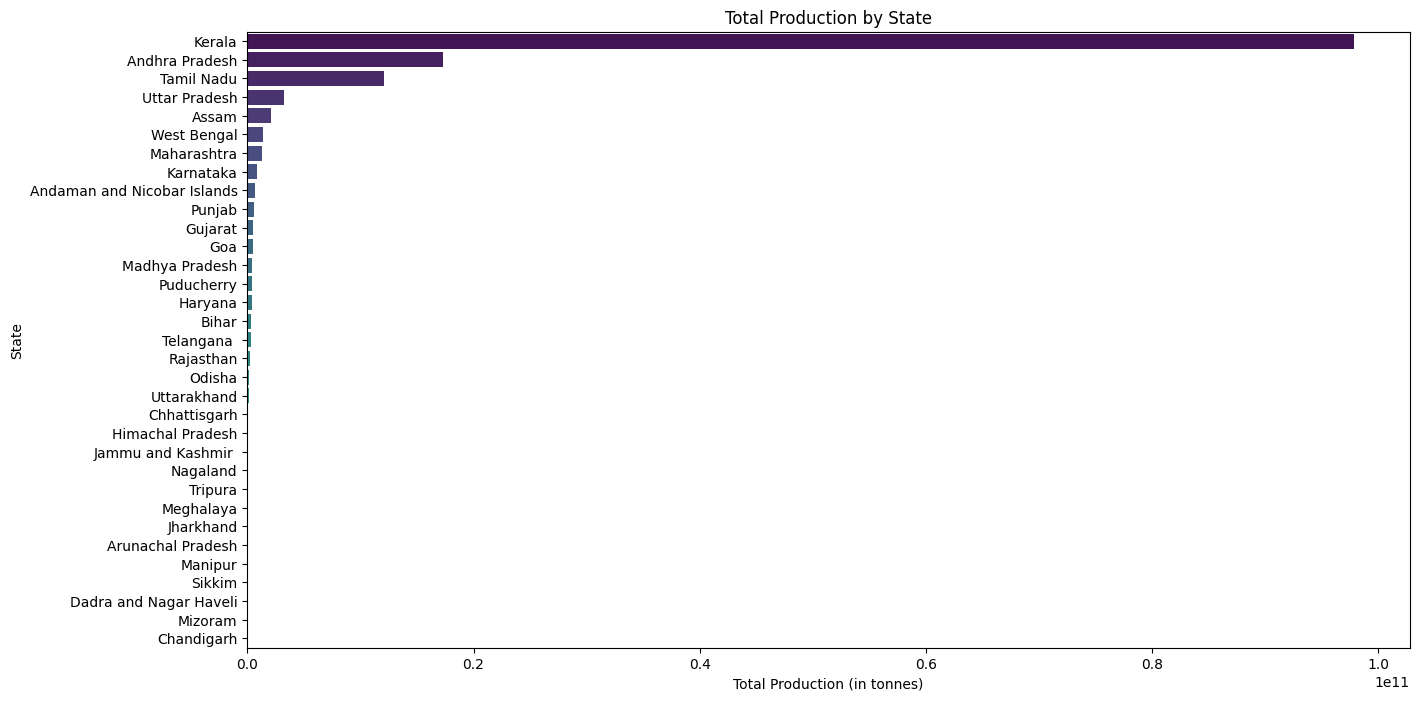

In [79]:
# Plotting state-wise production
plt.figure(figsize=(15, 8))
sns.barplot(x='Total Production', y='State', data=state_production.sort_values(by='Total Production', ascending=False), palette='viridis')
plt.title('Total Production by State')
plt.xlabel('Total Production (in tonnes)')
plt.ylabel('State')
plt.show()

**Season-wise Production**

<ipython-input-80-c2dea48319c4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Total Production', data=season_production, palette='coolwarm')


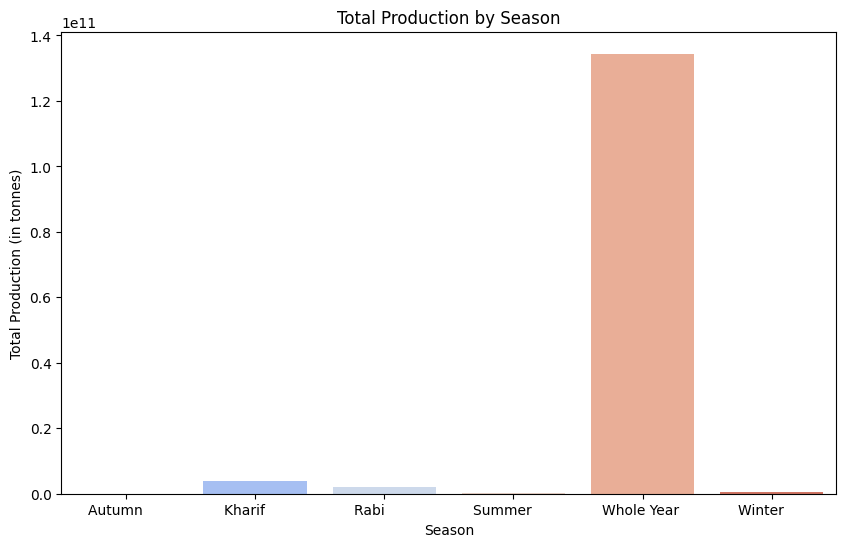

In [80]:
# Plotting season-wise production
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Total Production', data=season_production, palette='coolwarm')
plt.title('Total Production by Season')
plt.xlabel('Season')
plt.ylabel('Total Production (in tonnes)')
plt.show()

**Year-wise Production Trend**

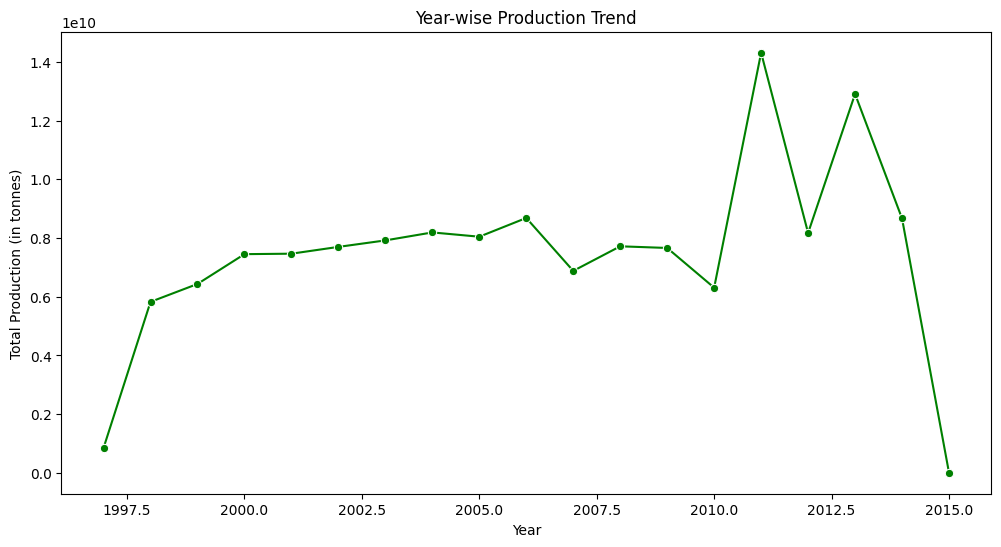

In [81]:
year_production = df.groupby('Crop_Year')['Production'].sum().reset_index()
year_production.columns = ['Year', 'Total Production']

# Plotting year-wise production
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total Production', data=year_production, color='green', marker='o')
plt.title('Year-wise Production Trend')
plt.xlabel('Year')
plt.ylabel('Total Production (in tonnes)')
plt.show()

**Crop-wise Production**

<ipython-input-82-fa102f343e94>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Production', y='Crop', data=crop_production.sort_values(by='Total Production', ascending=False), palette='inferno')


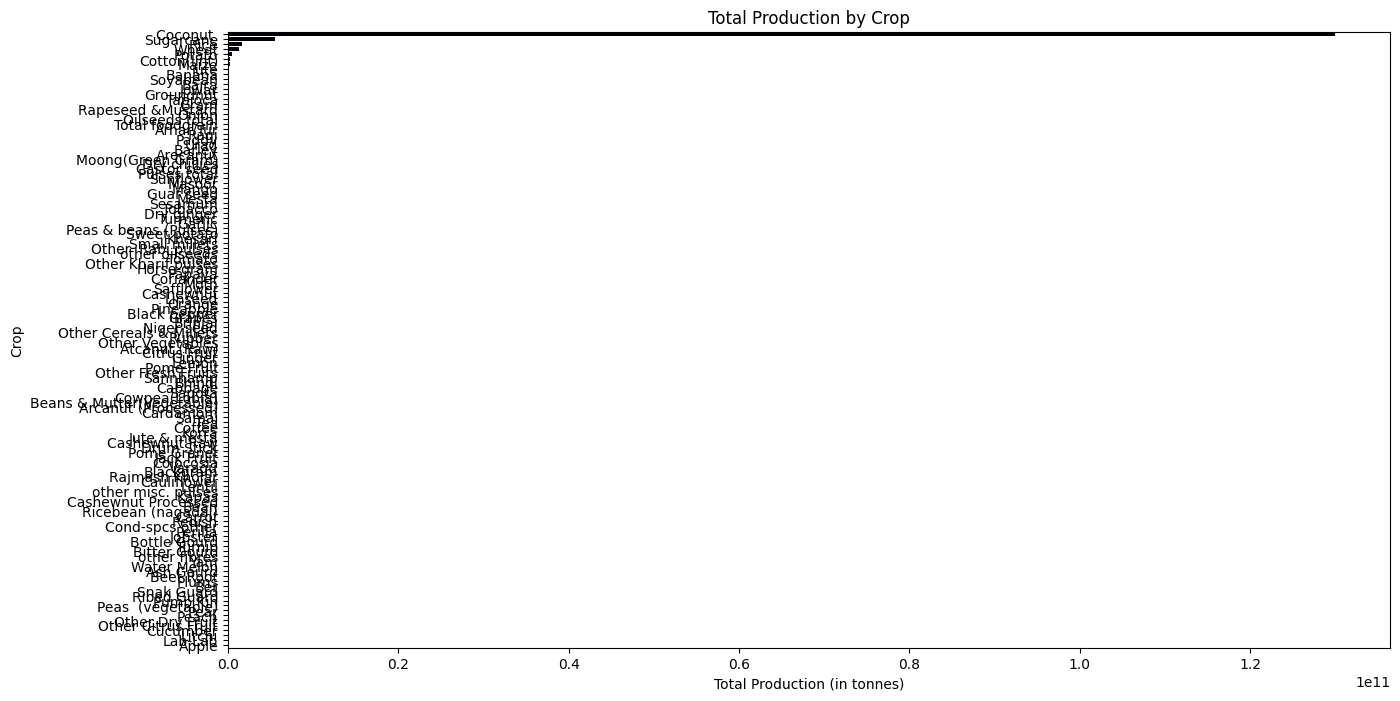

In [82]:
# Crop-wise Production
plt.figure(figsize=(15, 8))
sns.barplot(x='Total Production', y='Crop', data=crop_production.sort_values(by='Total Production', ascending=False), palette='inferno')
plt.title('Total Production by Crop')
plt.xlabel('Total Production (in tonnes)')
plt.ylabel('Crop')
plt.show()

**State-wise Production Density Plot**

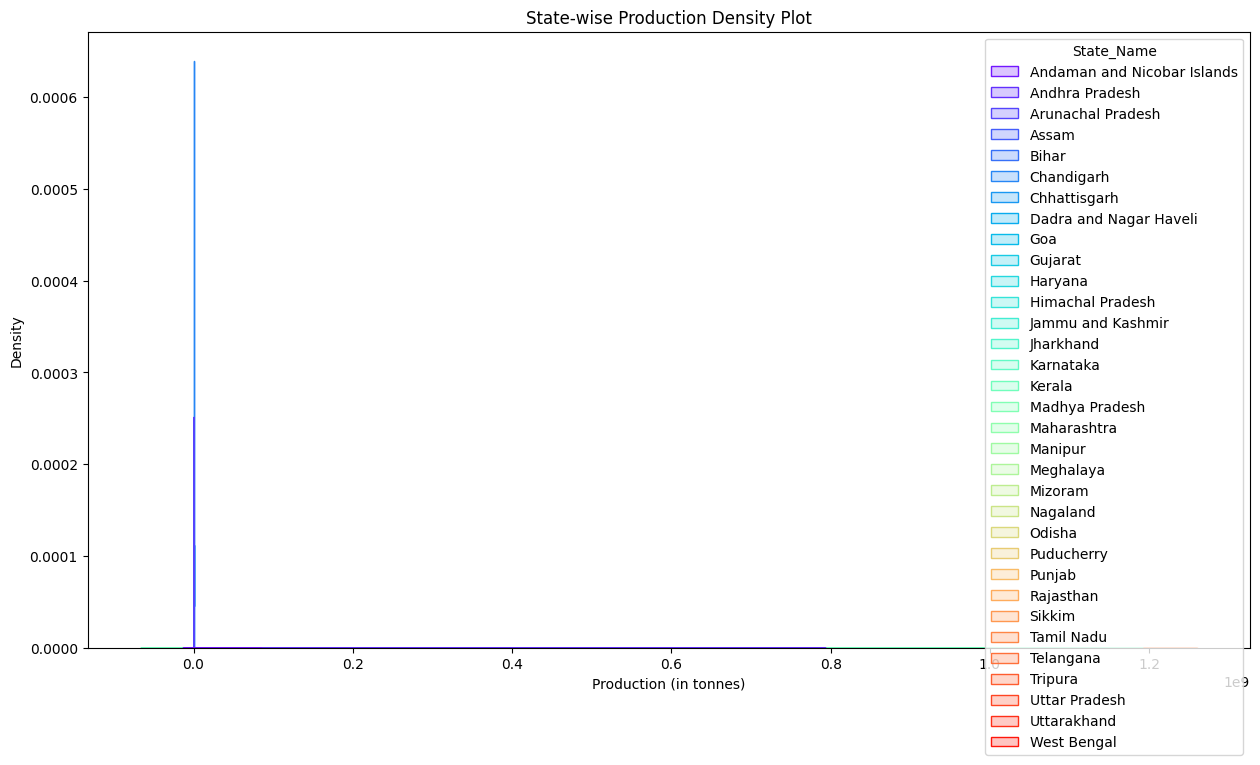

In [83]:
# State-wise Production Density Plot
plt.figure(figsize=(15, 8))
sns.kdeplot(data=df, x='Production', hue='State_Name', fill=True, common_norm=False, palette='rainbow')
plt.title('State-wise Production Density Plot')
plt.xlabel('Production (in tonnes)')
plt.ylabel('Density')
plt.show()

**Crop Production Correlation Heatmap**

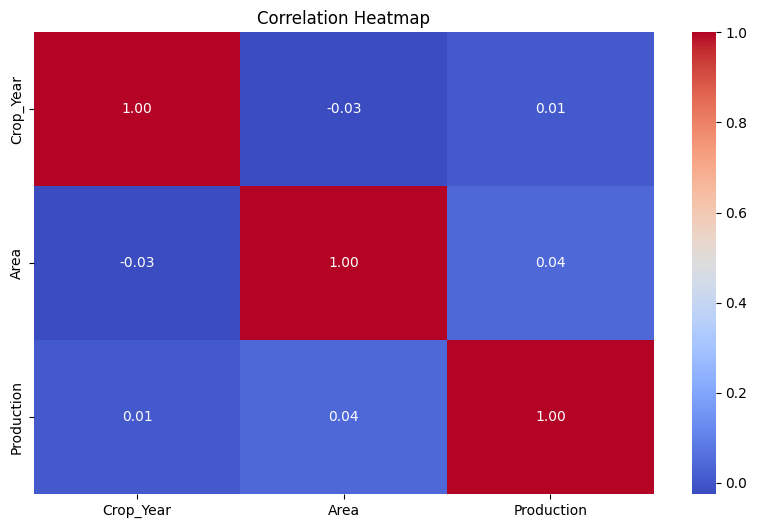

In [84]:
# Assuming df is your DataFrame
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Top 10 Districts by Production**

<ipython-input-85-e6b0f014afb5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Production', y='District_Name', data=top_districts, palette='cubehelix')


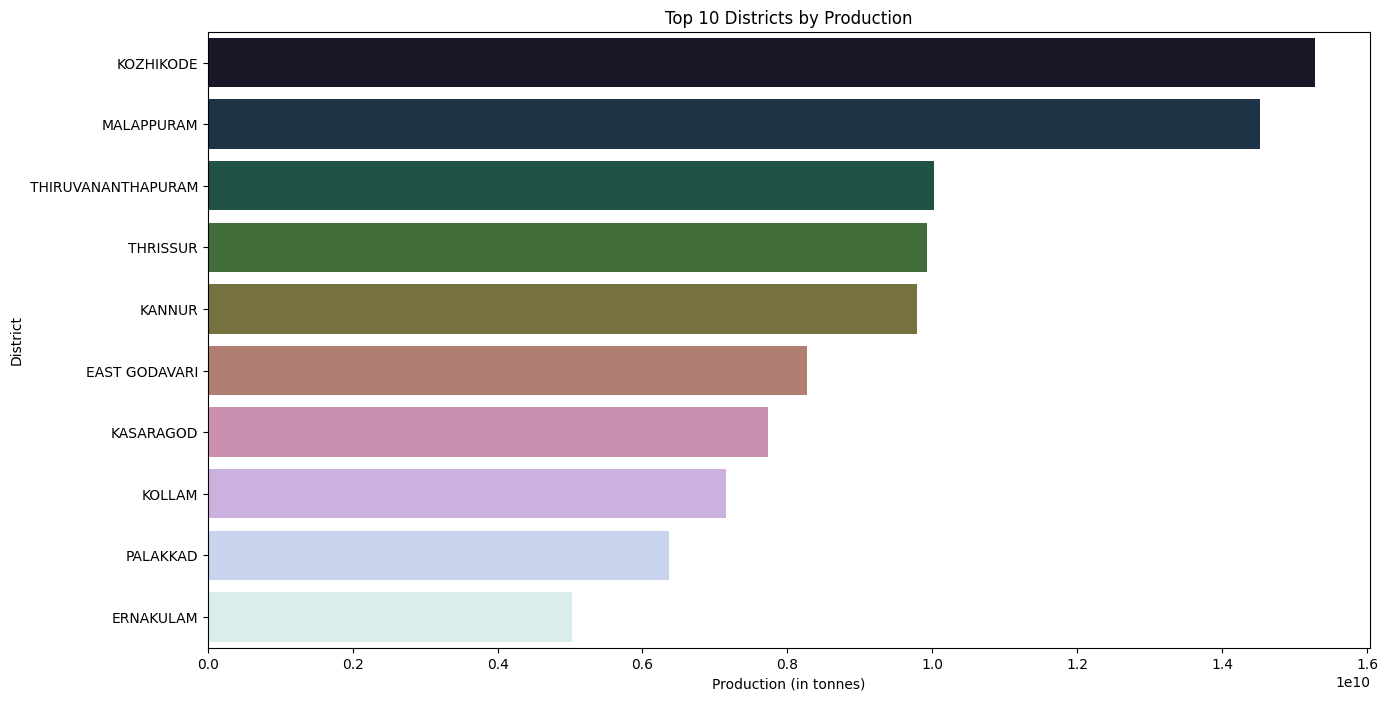

In [85]:
# Top 10 Districts by Production
top_districts = df.groupby('District_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
plt.figure(figsize=(15, 8))
sns.barplot(x='Production', y='District_Name', data=top_districts, palette='cubehelix')
plt.title('Top 10 Districts by Production')
plt.xlabel('Production (in tonnes)')
plt.ylabel('District')
plt.show()

**Pairplot for Key Variables**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

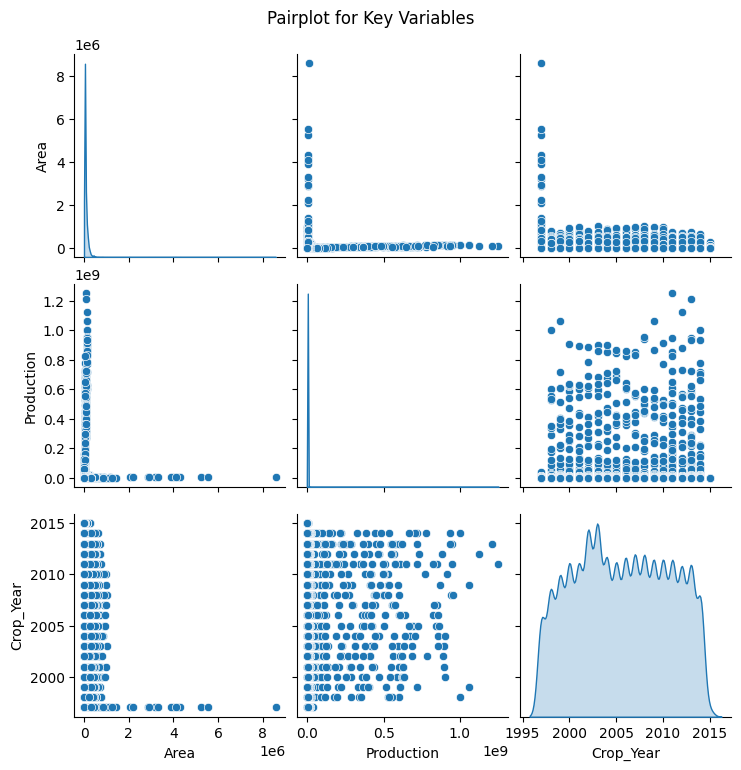

In [86]:
# Pairplot for Key Variables
sns.pairplot(df[['Area', 'Production', 'Crop_Year']], diag_kind='kde', palette='husl')
plt.suptitle('Pairplot for Key Variables', y=1.02)
plt.show()

**Production by Crop Type over Years**

<ipython-input-87-2ee5fe987a76>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Crop_Year', y='Production', hue='Crop', ci=None, palette='tab20')


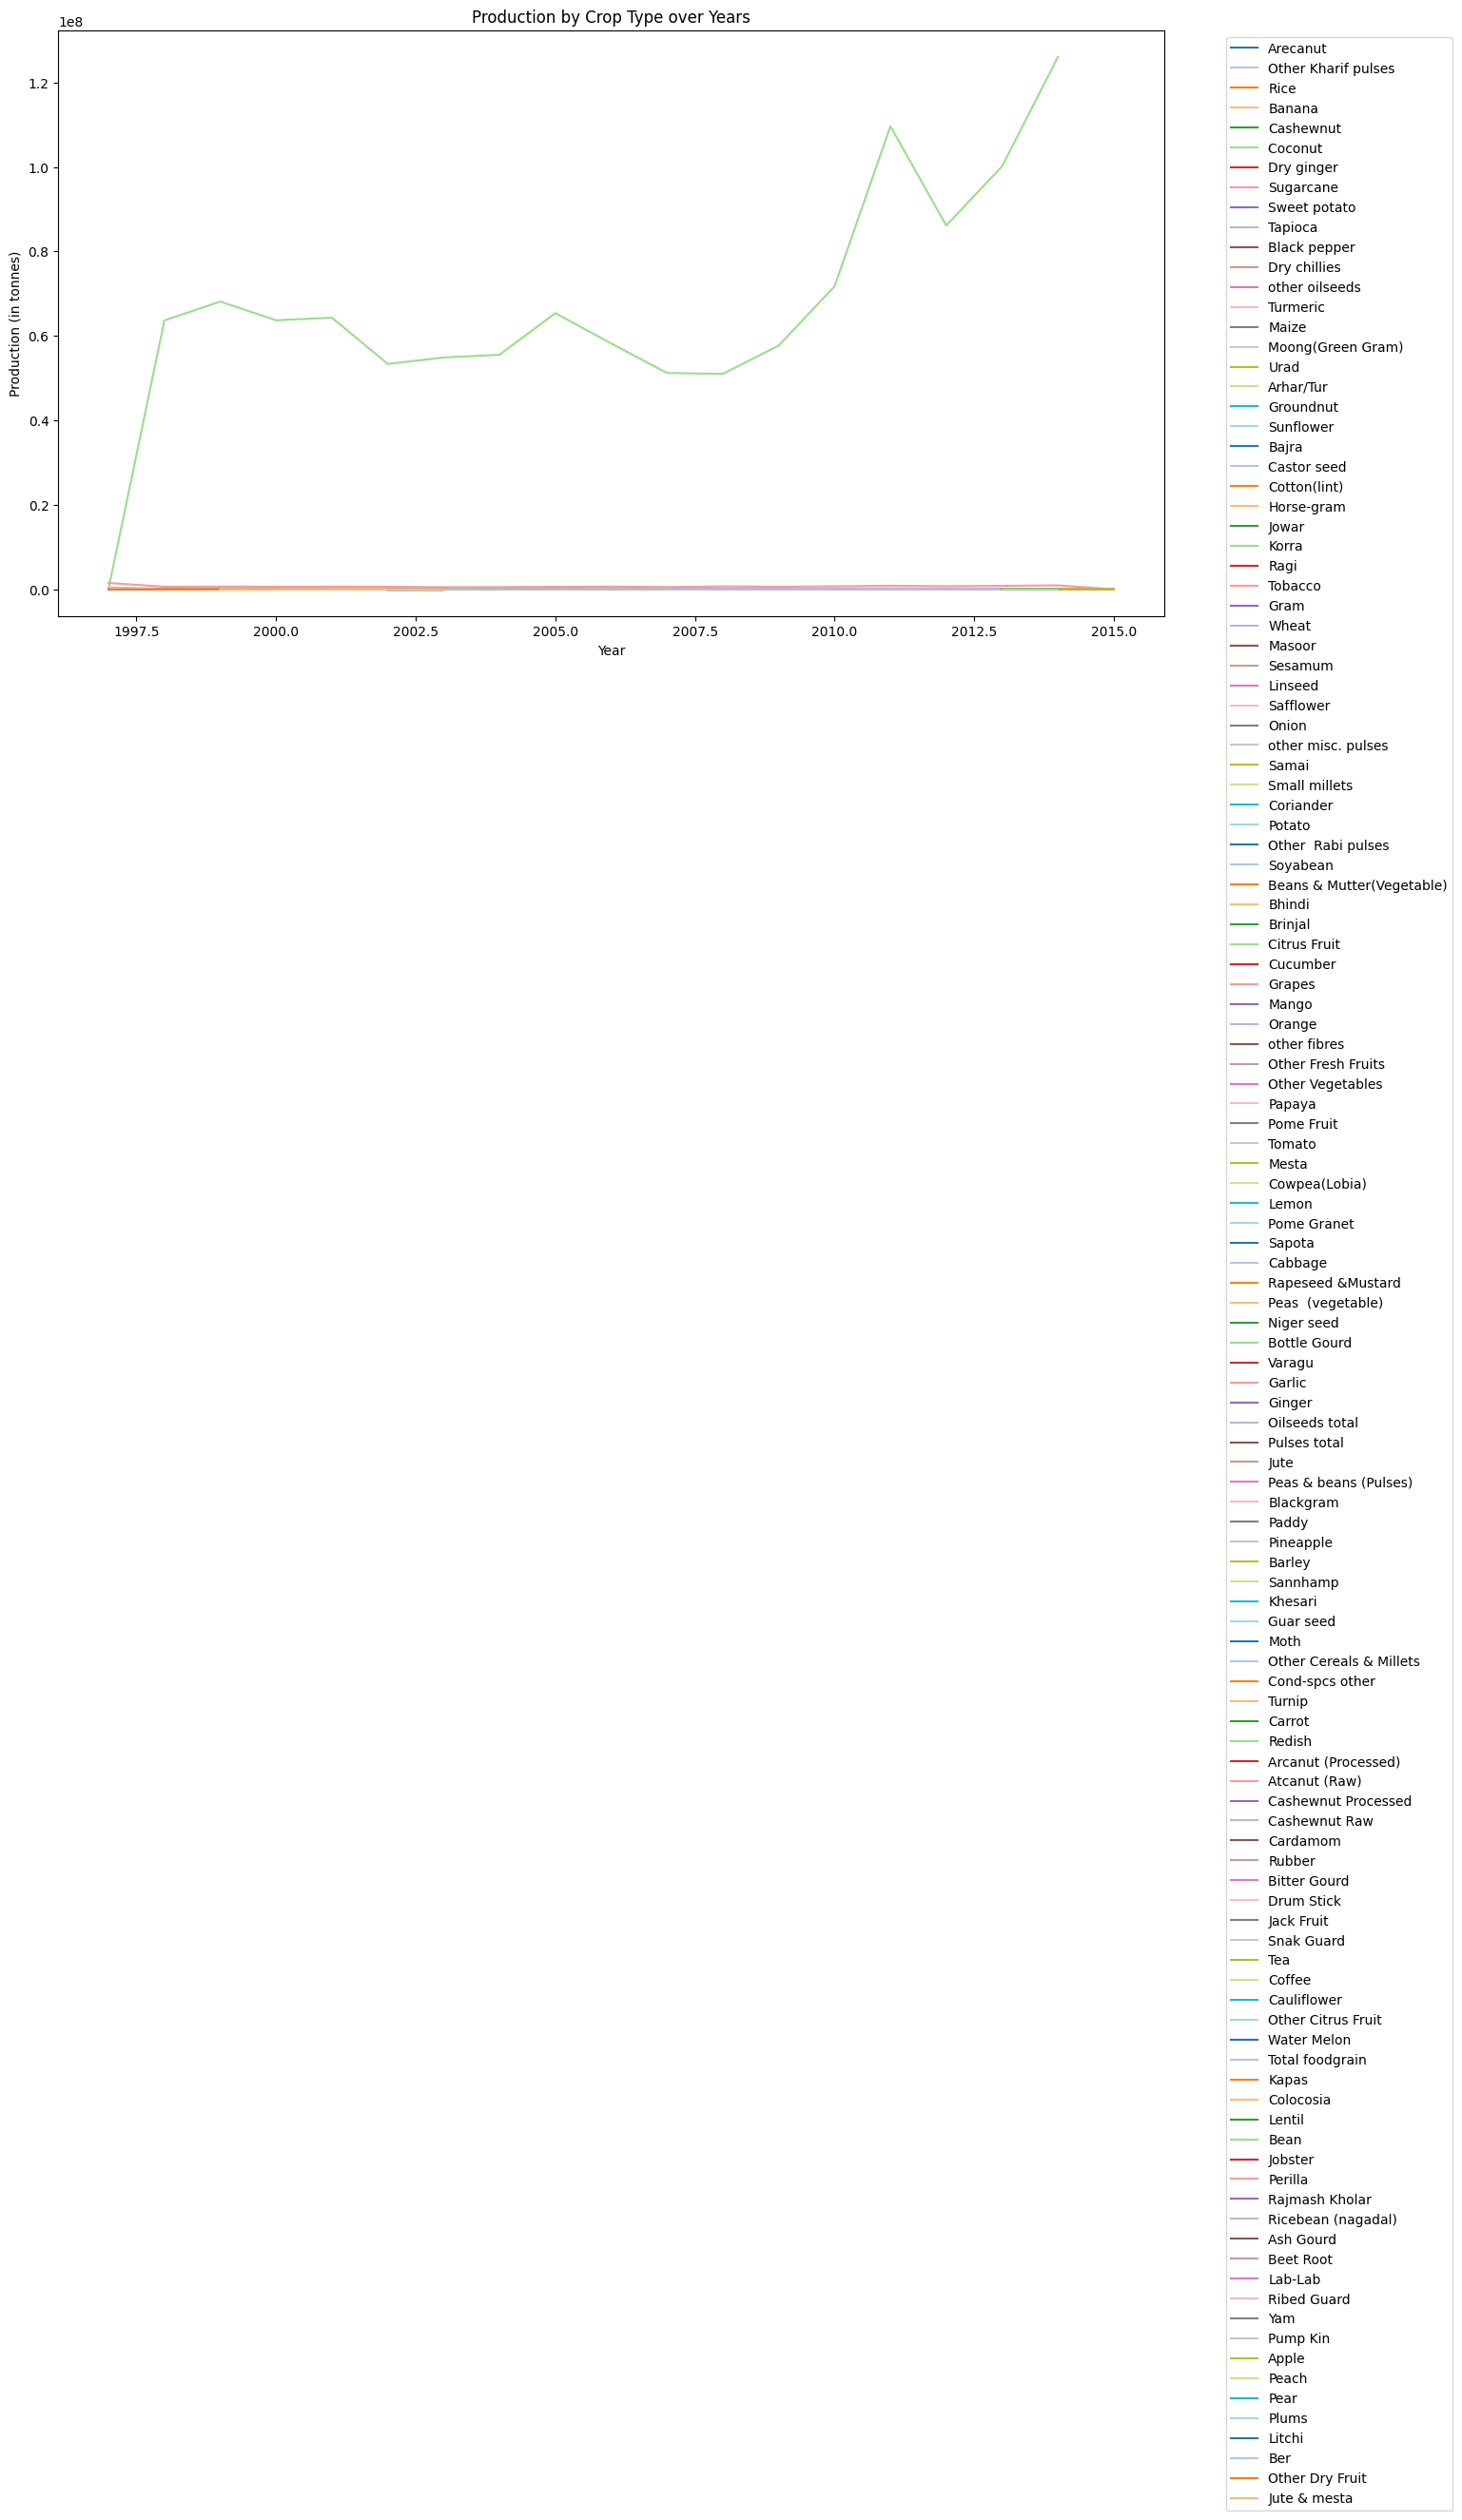

In [87]:
# Production by Crop Type over Years
plt.figure(figsize=(15, 8))
sns.lineplot(data=df, x='Crop_Year', y='Production', hue='Crop', ci=None, palette='tab20')
plt.title('Production by Crop Type over Years')
plt.xlabel('Year')
plt.ylabel('Production (in tonnes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Area vs. Production Scatter Plot**

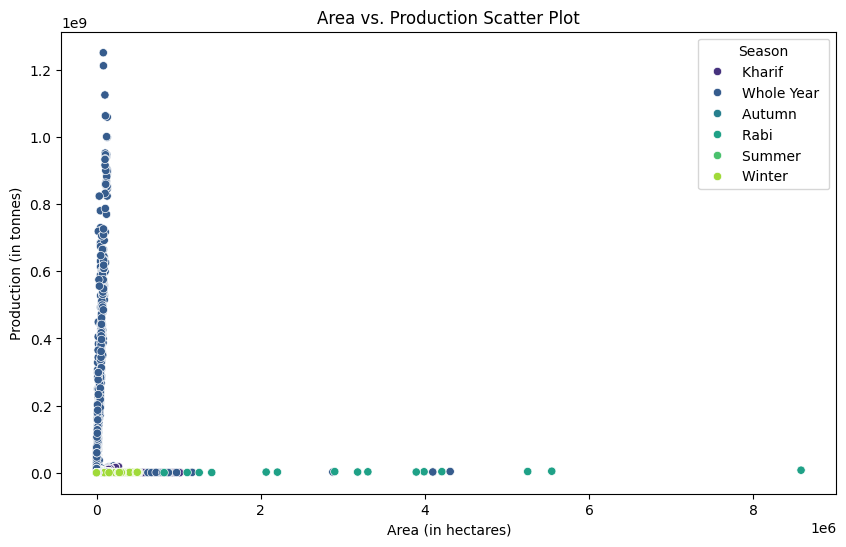

In [88]:
# Area vs. Production Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Production', data=df, hue='Season', palette='viridis')
plt.title('Area vs. Production Scatter Plot')
plt.xlabel('Area (in hectares)')
plt.ylabel('Production (in tonnes)')
plt.show()

**Production Distribution by Season**

<ipython-input-89-6b8fa03205c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Production', data=df, palette='Set2')


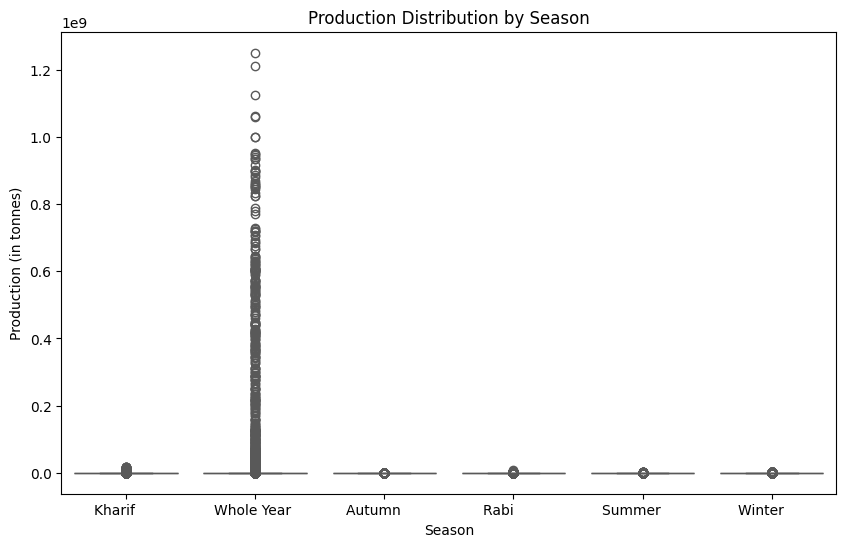

In [89]:
# Production Distribution by Season
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Production', data=df, palette='Set2')
plt.title('Production Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Production (in tonnes)')
plt.show()

###**Step 7: Predictive Analysis***

Implement a predictive model to forecast crop production. We will use a simple linear regression model as an example.

**Preparing the Data**

In [90]:
# Feature selection
X = df[['Area', 'Crop_Year']]
y = df['Production']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Training the Model**

In [91]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

**Evaluating the Model**

In [92]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 401500837552061.3
R-squared: 0.00208025972940562


###**Step 8: Results**

- **Mean Squared Error:** 401500837552061.3
- **R-squared:** 0

###**Step 9: Conclusion**

**Summary:** In conclusion, this project provides insights into crop production patterns in India using data analytics. It highlights challenges in predicting crop yields accurately due to various factors influencing production.

**Implications:** The findings can assist policymakers and agricultural stakeholders in making informed decisions to enhance crop productivity and sustainability.

**Future Work:** Future research could focus on integrating additional datasets and employing advanced machine learning models for more accurate production forecasts.

###**Step 10: Limitations**

**Data Limitations:**

- The dataset had missing values and limited historical data, affecting model performance.

**Methodological Limitations:**

- The use of a simple linear regression model may not capture complex relationships affecting crop production.

###**Step 11: Final Thoughts**

This project provides a comprehensive analysis of crop production in India, highlighting key trends and patterns. By leveraging data analytics and machine learning, we can gain valuable insights that can help optimize agricultural practices and policies. Future work should focus on enhancing the predictive capabilities and exploring deeper insights to support sustainable agricultural development.


###***Thank Q, for your Time!***